## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import tensorflow as tf
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

W0712 23:08:26.964660 24620 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 23:08:26.965667 24620 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 23:08:26.969648 24620 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0712 23:08:27.045443 24620 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 23:08:27.051427 24620 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
EPOCHS = 500

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0712 23:08:27.161806 24620 deprecation.py:323] From C:\Users\vince\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 23:08:27.272476 24620 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.9460 - acc: 0.2925 - val_loss: 1.7834 - val_acc: 0.3673
Epoch 2/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.7110 - acc: 0.3880 - val_loss: 1.6634 - val_acc: 0.4042
Epoch 3/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.6216 - acc: 0.4232 - val_loss: 1.5989 - val_acc: 0.4368
Epoch 4/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.5603 - acc: 0.4439 - val_loss: 1.5409 - val_acc: 0.4581
Epoch 5/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.5077 - acc: 0.4610 - val_loss: 1.5842 - val_acc: 0.4331
Epoch 6/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.4692 - acc: 0.4733 - val_loss: 1.5219 - val_acc: 0.4597
Epoch 7/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.4370 - acc: 0.4885 - val_loss: 1.4997 - 

50000/50000 [==============================] - 3s 64us/step - loss: 0.5496 - acc: 0.8027 - val_loss: 1.9767 - val_acc: 0.5137
Epoch 60/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5514 - acc: 0.8028 - val_loss: 1.9848 - val_acc: 0.5151
Epoch 61/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.5230 - acc: 0.8148 - val_loss: 2.0249 - val_acc: 0.5102
Epoch 62/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.5113 - acc: 0.8186 - val_loss: 2.1130 - val_acc: 0.5087
Epoch 63/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5092 - acc: 0.8181 - val_loss: 2.1260 - val_acc: 0.5161
Epoch 64/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.4970 - acc: 0.8214 - val_loss: 2.1223 - val_acc: 0.5171
Epoch 65/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4851 - acc: 0.8258 - val_loss: 2.2127 - val_acc: 0.5009
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2518 - acc: 0.9105 - val_loss: 3.5187 - val_acc: 0.4904
Epoch 119/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2541 - acc: 0.9080 - val_loss: 3.4140 - val_acc: 0.4979
Epoch 120/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2266 - acc: 0.9183 - val_loss: 3.5288 - val_acc: 0.4888
Epoch 121/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2368 - acc: 0.9155 - val_loss: 3.4353 - val_acc: 0.4973
Epoch 122/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2399 - acc: 0.9134 - val_loss: 3.4186 - val_acc: 0.4971
Epoch 123/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2410 - acc: 0.9126 - val_loss: 3.5028 - val_acc: 0.4905
Epoch 124/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2574 - acc: 0.9069 - val_loss: 3.5055 - val_acc: 0.4980
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 65us/step - loss: 0.1694 - acc: 0.9392 - val_loss: 4.1410 - val_acc: 0.4939
Epoch 177/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1267 - acc: 0.9546 - val_loss: 4.2022 - val_acc: 0.4962
Epoch 178/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1467 - acc: 0.9486 - val_loss: 4.2764 - val_acc: 0.4865
Epoch 179/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2302 - acc: 0.9201 - val_loss: 4.1789 - val_acc: 0.4903
Epoch 180/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1407 - acc: 0.9502 - val_loss: 4.2363 - val_acc: 0.4933
Epoch 181/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1265 - acc: 0.9541 - val_loss: 4.1621 - val_acc: 0.4955
Epoch 182/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1480 - acc: 0.9471 - val_loss: 4.2120 - val_acc: 0.4888
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 65us/step - loss: 0.1151 - acc: 0.9597 - val_loss: 4.6181 - val_acc: 0.4849
Epoch 235/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1057 - acc: 0.9632 - val_loss: 4.6790 - val_acc: 0.4892
Epoch 236/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1303 - acc: 0.9560 - val_loss: 4.6370 - val_acc: 0.4864
Epoch 237/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1190 - acc: 0.9579 - val_loss: 4.6683 - val_acc: 0.4883
Epoch 238/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1416 - acc: 0.9505 - val_loss: 4.7712 - val_acc: 0.4884
Epoch 239/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1179 - acc: 0.9591 - val_loss: 4.6306 - val_acc: 0.4980
Epoch 240/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1088 - acc: 0.9611 - val_loss: 4.6990 - val_acc: 0.4843
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 0.1117 - acc: 0.9616 - val_loss: 4.8973 - val_acc: 0.4847
Epoch 293/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0984 - acc: 0.9657 - val_loss: 4.9019 - val_acc: 0.4926
Epoch 294/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1803 - acc: 0.9421 - val_loss: 4.9201 - val_acc: 0.4808
Epoch 295/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0949 - acc: 0.9679 - val_loss: 4.8435 - val_acc: 0.4873
Epoch 296/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0854 - acc: 0.9703 - val_loss: 4.9111 - val_acc: 0.4898
Epoch 297/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0997 - acc: 0.9660 - val_loss: 4.8553 - val_acc: 0.4946
Epoch 298/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0757 - acc: 0.9736 - val_loss: 4.8857 - val_acc: 0.4922
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.1990 - acc: 0.9409 - val_loss: 5.1695 - val_acc: 0.4812
Epoch 351/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1863 - acc: 0.9422 - val_loss: 5.2055 - val_acc: 0.4816
Epoch 352/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0744 - acc: 0.9756 - val_loss: 5.1556 - val_acc: 0.4878
Epoch 353/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0670 - acc: 0.9762 - val_loss: 5.0639 - val_acc: 0.4904
Epoch 354/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0767 - acc: 0.9741 - val_loss: 5.2030 - val_acc: 0.4816
Epoch 355/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1229 - acc: 0.9604 - val_loss: 5.3437 - val_acc: 0.4751
Epoch 356/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1078 - acc: 0.9648 - val_loss: 5.1589 - val_acc: 0.4857
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.1065 - acc: 0.9643 - val_loss: 5.3149 - val_acc: 0.4825
Epoch 409/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0810 - acc: 0.9725 - val_loss: 5.2087 - val_acc: 0.4919
Epoch 410/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0644 - acc: 0.9784 - val_loss: 5.3031 - val_acc: 0.4886
Epoch 411/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1189 - acc: 0.9611 - val_loss: 5.3226 - val_acc: 0.4793
Epoch 412/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1463 - acc: 0.9556 - val_loss: 5.1964 - val_acc: 0.4896
Epoch 413/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0573 - acc: 0.9800 - val_loss: 5.2755 - val_acc: 0.4884
Epoch 414/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0349 - acc: 0.9884 - val_loss: 5.2594 - val_acc: 0.4912
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 65us/step - loss: 0.1946 - acc: 0.9432 - val_loss: 5.4558 - val_acc: 0.4779
Epoch 467/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1184 - acc: 0.9631 - val_loss: 5.2644 - val_acc: 0.4959
Epoch 468/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0575 - acc: 0.9806 - val_loss: 5.3095 - val_acc: 0.4934
Epoch 469/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0456 - acc: 0.9847 - val_loss: 5.3210 - val_acc: 0.4906
Epoch 470/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0509 - acc: 0.9826 - val_loss: 5.3000 - val_acc: 0.4975
Epoch 471/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0938 - acc: 0.9696 - val_loss: 5.3817 - val_acc: 0.4856
Epoch 472/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1258 - acc: 0.9605 - val_loss: 5.3572 - val_acc: 0.4820
Epoch 473/500
50000/50000 [=======

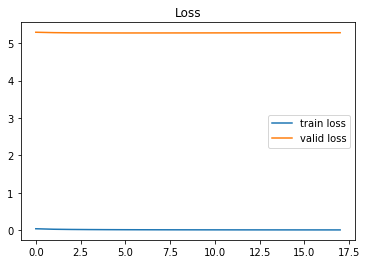

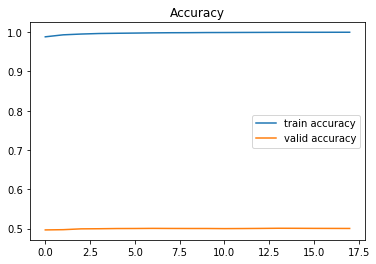

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
# optimizer 換成 SGD
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 63us/step - loss: 2.2551 - acc: 0.1655 - val_loss: 2.2087 - val_acc: 0.2047
Epoch 2/500
50000/50000 [==============================] - 3s 58us/step - loss: 2.1764 - acc: 0.2274 - val_loss: 2.1495 - val_acc: 0.2367
Epoch 3/500
50000/50000 [==============================] - 3s 59us/step - loss: 2.1239 - acc: 0.2538 - val_loss: 2.1022 - val_acc: 0.2622
Epoch 4/500
50000/50000 [==============================] - 3s 61us/step - loss: 2.0811 - acc: 0.2719 - val_loss: 2.0635 - val_acc: 0.2724
Epoch 5/500
50000/50000 [==============================] - 3s 57us/step - loss: 2.0463 - acc: 0.2840 - val_loss: 2.0318 - val_acc: 0.2865
Epoch 6/500
50000/50000 [==============================] - 3s 60us/step - loss: 2.0174 - acc: 0.2955 - val_loss: 2.0054 - val_acc: 0.3039
Epoch 7/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.9927 - acc: 0.3058 - val_loss: 1.9820 - 

50000/50000 [==============================] - 3s 58us/step - loss: 1.6505 - acc: 0.4251 - val_loss: 1.6574 - val_acc: 0.4189
Epoch 60/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6475 - acc: 0.4262 - val_loss: 1.6532 - val_acc: 0.4206
Epoch 61/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.6442 - acc: 0.4267 - val_loss: 1.6513 - val_acc: 0.4228
Epoch 62/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6414 - acc: 0.4279 - val_loss: 1.6493 - val_acc: 0.4206
Epoch 63/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6382 - acc: 0.4288 - val_loss: 1.6480 - val_acc: 0.4245
Epoch 64/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6355 - acc: 0.4296 - val_loss: 1.6437 - val_acc: 0.4263
Epoch 65/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6325 - acc: 0.4319 - val_loss: 1.6394 - val_acc: 0.4259
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5114 - acc: 0.4729 - val_loss: 1.5389 - val_acc: 0.4589
Epoch 119/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5095 - acc: 0.4733 - val_loss: 1.5410 - val_acc: 0.4616
Epoch 120/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5075 - acc: 0.4741 - val_loss: 1.5348 - val_acc: 0.4618
Epoch 121/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5059 - acc: 0.4741 - val_loss: 1.5338 - val_acc: 0.4602
Epoch 122/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5039 - acc: 0.4758 - val_loss: 1.5331 - val_acc: 0.4617
Epoch 123/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5023 - acc: 0.4764 - val_loss: 1.5418 - val_acc: 0.4573
Epoch 124/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5006 - acc: 0.4773 - val_loss: 1.5333 - val_acc: 0.4585
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 53us/step - loss: 1.4174 - acc: 0.5041 - val_loss: 1.4724 - val_acc: 0.4793
Epoch 177/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4163 - acc: 0.5053 - val_loss: 1.4705 - val_acc: 0.4798
Epoch 178/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4146 - acc: 0.5053 - val_loss: 1.4693 - val_acc: 0.4817
Epoch 179/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.4132 - acc: 0.5066 - val_loss: 1.4670 - val_acc: 0.4814
Epoch 180/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4122 - acc: 0.5059 - val_loss: 1.4712 - val_acc: 0.4769
Epoch 181/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4101 - acc: 0.5069 - val_loss: 1.4693 - val_acc: 0.4802
Epoch 182/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4090 - acc: 0.5070 - val_loss: 1.4641 - val_acc: 0.4827
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 1.3387 - acc: 0.5319 - val_loss: 1.4236 - val_acc: 0.4946
Epoch 235/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.3377 - acc: 0.5316 - val_loss: 1.4285 - val_acc: 0.4915
Epoch 236/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.3357 - acc: 0.5321 - val_loss: 1.4190 - val_acc: 0.4945
Epoch 237/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.3351 - acc: 0.5339 - val_loss: 1.4185 - val_acc: 0.4981
Epoch 238/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.3335 - acc: 0.5326 - val_loss: 1.4218 - val_acc: 0.4932
Epoch 239/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3322 - acc: 0.5347 - val_loss: 1.4242 - val_acc: 0.4971
Epoch 240/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.3313 - acc: 0.5345 - val_loss: 1.4180 - val_acc: 0.5021
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 1.2696 - acc: 0.5554 - val_loss: 1.3997 - val_acc: 0.5017
Epoch 293/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2682 - acc: 0.5564 - val_loss: 1.4036 - val_acc: 0.4991
Epoch 294/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.2670 - acc: 0.5579 - val_loss: 1.3883 - val_acc: 0.5084
Epoch 295/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2659 - acc: 0.5575 - val_loss: 1.3975 - val_acc: 0.5051
Epoch 296/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2650 - acc: 0.5574 - val_loss: 1.3859 - val_acc: 0.5073
Epoch 297/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2634 - acc: 0.5589 - val_loss: 1.3840 - val_acc: 0.5103
Epoch 298/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.2620 - acc: 0.5573 - val_loss: 1.3838 - val_acc: 0.5063
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 1.2053 - acc: 0.5795 - val_loss: 1.3652 - val_acc: 0.5144
Epoch 351/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2036 - acc: 0.5784 - val_loss: 1.3777 - val_acc: 0.5082
Epoch 352/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.2019 - acc: 0.5800 - val_loss: 1.3894 - val_acc: 0.5087
Epoch 353/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2027 - acc: 0.5801 - val_loss: 1.3654 - val_acc: 0.5185
Epoch 354/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2012 - acc: 0.5803 - val_loss: 1.3822 - val_acc: 0.5066
Epoch 355/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1994 - acc: 0.5818 - val_loss: 1.3972 - val_acc: 0.5110
Epoch 356/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1992 - acc: 0.5803 - val_loss: 1.3734 - val_acc: 0.5118
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 54us/step - loss: 1.1453 - acc: 0.6001 - val_loss: 1.3705 - val_acc: 0.5161
Epoch 409/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1434 - acc: 0.6005 - val_loss: 1.3565 - val_acc: 0.5203
Epoch 410/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.1427 - acc: 0.6003 - val_loss: 1.3412 - val_acc: 0.5240
Epoch 411/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1397 - acc: 0.6028 - val_loss: 1.3570 - val_acc: 0.5210
Epoch 412/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1397 - acc: 0.6034 - val_loss: 1.3546 - val_acc: 0.5188
Epoch 413/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.1388 - acc: 0.6038 - val_loss: 1.3790 - val_acc: 0.5109
Epoch 414/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.1389 - acc: 0.6026 - val_loss: 1.4043 - val_acc: 0.5031
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 1.0859 - acc: 0.6223 - val_loss: 1.3515 - val_acc: 0.5229
Epoch 467/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.0855 - acc: 0.6217 - val_loss: 1.4177 - val_acc: 0.4965
Epoch 468/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.0858 - acc: 0.6207 - val_loss: 1.3821 - val_acc: 0.5167
Epoch 469/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0844 - acc: 0.6217 - val_loss: 1.3562 - val_acc: 0.5223
Epoch 470/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.0827 - acc: 0.6235 - val_loss: 1.3510 - val_acc: 0.5259
Epoch 471/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.0843 - acc: 0.6215 - val_loss: 1.3500 - val_acc: 0.5241
Epoch 472/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.0787 - acc: 0.6236 - val_loss: 1.3923 - val_acc: 0.5120
Epoch 473/500
50000/50000 [=======

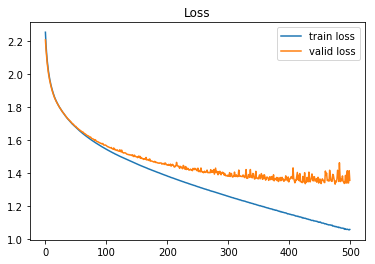

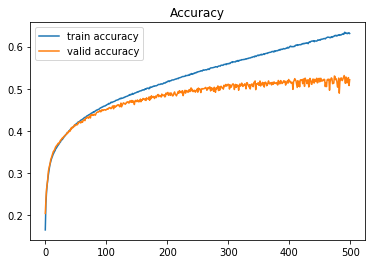

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()